# Loading Dataset

In [1]:
import os
from dotenv import load_dotenv

# Loading environment variables from .env
load_dotenv()

# Changing directory to main directory for easy data access
working_directory = os.getenv("WORKING_DIRECTORY")
os.chdir(working_directory)

In [2]:
import pandas as pd

# Loading is data previously downloaded
path = 'data/books.csv'
books = pd.read_csv(path)

# Printing the data to check validity
books.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


# Inspecting the data

In [ ]:
# The kaggle page shows 6810 unique ISBN13 and ISBN10 numbers, as well as a total value count of 6810
# Total number of columns mentioned is 12
# https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata

books.shape

(6810, 12)

In [ ]:
# Function to obtain summary of the data
import pandas as pd

def detailed_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Unique Values': df.nunique(),
        'Sample Value': df.apply(lambda x: x.dropna().unique()[0] if x.dropna().any() else None)
    })

    # Add numeric stats if applicable
    numeric_cols = df.select_dtypes(include='number').columns
    if not numeric_cols.empty:
        stats = df[numeric_cols].describe().T
        summary = summary.join(stats, how='left')

    return summary

# Obtaining detailed information about the loaded dataset
detailed_summary(books)

,Data Type,Non-Null Count,Null Count,Unique Values,Sample Value,count,mean,std,min,25%,50%,75%,max
isbn13,int64,6810,0,6810,9780002005883,6810.0,9.780677e+12,6.068911e+08,9.780002e+12,9.780330e+12,9.780553e+12,9.780810e+12,9.789042e+12
isbn10,object,6810,0,6810,0002005883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,6810,0,6398,Gilead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subtitle,object,2381,4429,2009,A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,object,6738,72,3780,Marilynne Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,object,6711,99,567,Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thumbnail,object,6481,329,6481,http://books.google.com/books/content?id=KQZCP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,object,6548,262,6474,A NOVEL THAT READERS and critics have been eag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_year,float64,6804,6,94,2004.0,6804.0,1.998630e+03,1.048426e+01,1.853000e+03,1.996000e+03,2.002000e+03,2.005000e+03,2.019000e+03
average_rating,float64,6767,43,200,3.85,6767.0,3.933284e+00,3.313516e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.130000e+00,5.000000e+00


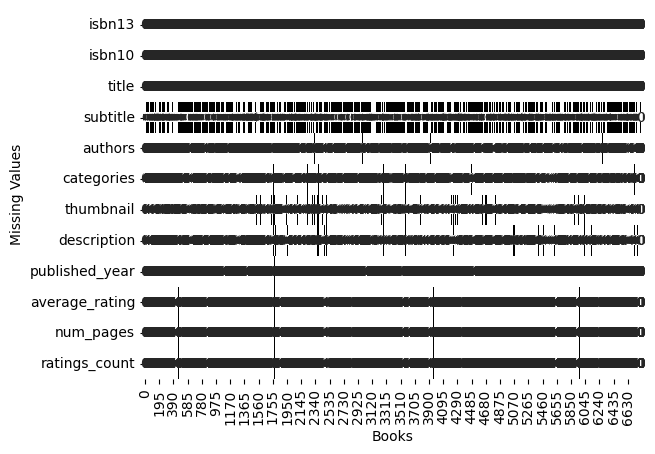

In [14]:
# Creating a missing data heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Defining color for heatmap
cmap = ListedColormap(['white', 'black'])  # False = white, True = black

# Creating heatmap
ax = plt.axes()
sns.heatmap(books.isna().transpose(), annot=True, ax=ax, cmap=cmap, cbar=False)

# Assigning axes labels
plt.xlabel("Books")
plt.ylabel("Missing Values")

# Generating plot
plt.show()

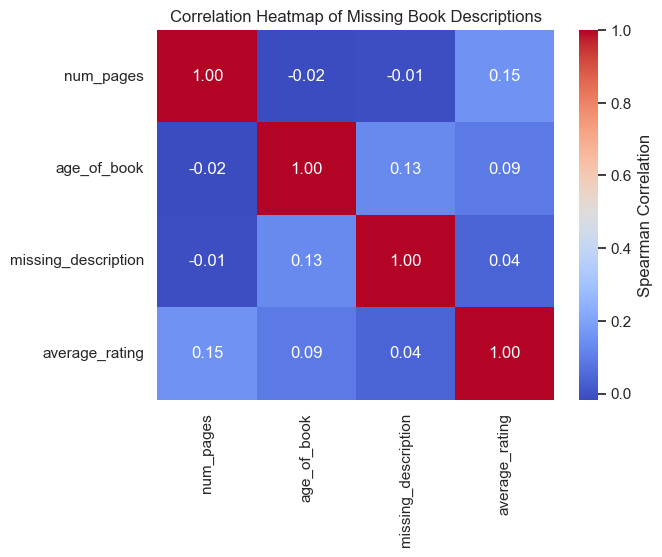

In [ ]:
# Need to check for bais where book description is missing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a copy of the main dataset to work with
books_bais_check = books.copy()

# Creating features
books_bais_check["missing_description"] = np.where(books_bais_check["description"].isna(), 1, 0)
books_bais_check["age_of_book"] = 2025 - books["published_year"]

# Only selecting coloumns of interest
cols_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# Creating a correlation maxtix
corr_mat = books_bais_check[cols_of_interest].corr(method="spearman")

# Creating heatmap using correlation matrix
sns.set_theme(style="white")
heatmap = sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman Correlation"})

heatmap.set_title("Correlation Heatmap of Missing Book Descriptions")

plt.show()

### Missing Data

In [40]:
# Since there does not seem to be any major correlation, checking
# if we can drop all the books with the columns of interest missing

total_missing = books[(books["num_pages"].isna()) |
      (books["published_year"].isna()) |
      (books["description"].isna()) |
      (books["average_rating"].isna())
    ]

print(f'Total Missing: {total_missing.shape[0]}') # Total missing
print(f'Percentage Missing: {total_missing.shape[0] / books.shape[0] * 100}%') # Percentage of books missing

Total Missing: 303
Percentage Missing: 4.4493392070484585%


In [42]:
# Droping the missing rows from books dataset

cleaned_books = books[~(books["num_pages"].isna()) &
                      ~(books["published_year"].isna()) &
                      ~(books["description"].isna()) &
                      ~(books["average_rating"].isna())
    ]

cleaned_books.head(2)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0


In [44]:
# Obtaining detailed information after dropping rows
detailed_summary(cleaned_books)

,Data Type,Non-Null Count,Null Count,Unique Values,Sample Value,count,mean,std,min,25%,50%,75%,max
isbn13,int64,6507,0,6507,9780002005883,6507.0,9.780668e+12,5.868404e+08,9.780002e+12,9.780317e+12,9.780552e+12,9.780807e+12,9.789042e+12
isbn10,object,6507,0,6507,0002005883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,object,6507,0,6133,Gilead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subtitle,object,2281,4226,1915,A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,object,6444,63,3629,Marilynne Robinson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,object,6474,33,531,Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thumbnail,object,6293,214,6293,http://books.google.com/books/content?id=KQZCP...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,object,6507,0,6434,A NOVEL THAT READERS and critics have been eag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_year,float64,6507,0,89,2004.0,6507.0,1.998966e+03,9.837214e+00,1.876000e+03,1.997000e+03,2.002000e+03,2.005000e+03,2.019000e+03
average_rating,float64,6507,0,198,3.85,6507.0,3.932683e+00,3.224266e-01,0.000000e+00,3.770000e+00,3.950000e+00,4.130000e+00,5.000000e+00


### Categories

In [51]:
categories = cleaned_books["categories"].value_counts().reset_index().sort_values("count", ascending=False)
categories

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


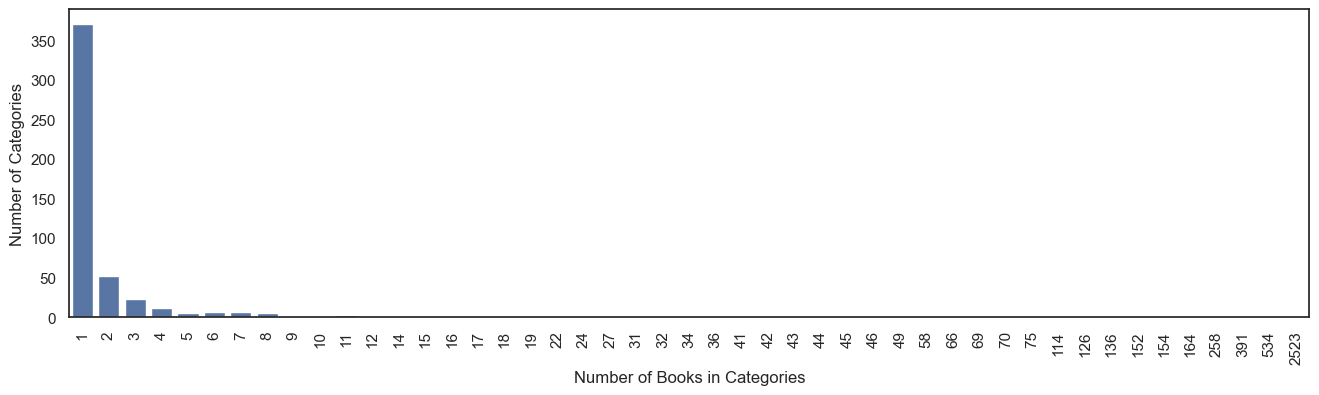

In [63]:
# Creating barchart to better visualize the categories
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
sns.barplot(data=categories["count"].value_counts())
plt.xticks(rotation=90)  # Rotating x-axis labels for readability

plt.xlabel("Number of Books in Categories")
plt.ylabel("Number of Categories")

plt.show()

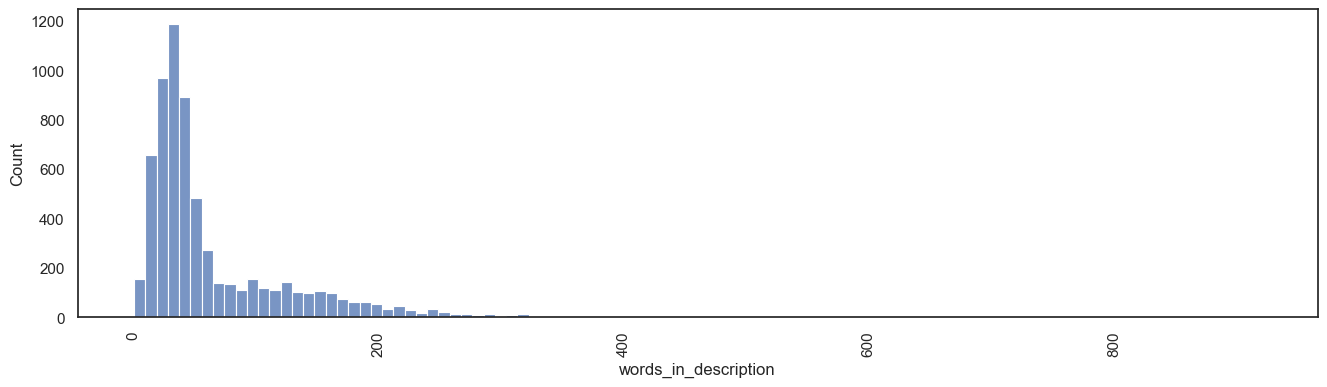

In [ ]:
# Seeing if we can reduce more books even more before reducing categories 
# by reducing books with bad descriptions

descrption_books = cleaned_books.copy()

descrption_books["words_in_description"] = descrption_books["description"].str.split().str.len()

plt.figure(figsize=(16, 4))
sns.histplot(data=descrption_books["words_in_description"], bins=100)
plt.xticks(rotation=90)  # Rotating x-axis labels for readability

plt.show()